# ASymCat: Simple Working Examples

This notebook provides working examples of ASymCat functionality using synthetic data that doesn't require external resources.

## Table of Contents
1. [Basic Setup](#basic-setup)
2. [Simple Asymmetric Example](#simple-asymmetric-example)
3. [Multiple Measures Comparison](#multiple-measures-comparison)
4. [Smoothing Effects](#smoothing-effects)
5. [Interpretation Guidelines](#interpretation-guidelines)

## Basic Setup

In [1]:
# Import required libraries
import asymcat
from asymcat.scorer import CatScorer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set up plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("ASymCat loaded successfully!")
print(f"Working directory: asymcat")

ASymCat loaded successfully!
Working directory: asymcat


## Simple Asymmetric Example

Let's create a simple dataset that demonstrates asymmetric relationships:

In [2]:
# Create synthetic asymmetric data
# Doctor → Treatment: strong prediction
# Treatment → Doctor: weak prediction
medical_data = [
    ('Dr_Smith', 'Aspirin'), ('Dr_Smith', 'Aspirin'), ('Dr_Smith', 'Aspirin'),  # Dr_Smith → Aspirin (75%)
    ('Dr_Smith', 'Ibuprofen'),                                                   # Dr_Smith → Ibuprofen (25%)
    ('Dr_Jones', 'Morphine'), ('Dr_Jones', 'Morphine'), ('Dr_Jones', 'Morphine'), # Dr_Jones → Morphine (100%)
    ('Dr_Brown', 'Aspirin'), ('Dr_Brown', 'Aspirin')                             # Dr_Brown → Aspirin (100%)
]

print("Medical prescription data:")
for i, (doctor, treatment) in enumerate(medical_data):
    print(f"  {i+1}. {doctor} prescribed {treatment}")

# Create scorer
scorer = CatScorer(medical_data, smoothing_method='laplace')

# Compute asymmetric measures
mle_scores = scorer.mle()
theil_scores = scorer.theil_u()

print("\nAsymmetric Analysis Results:")
print("=" * 40)

for pair, (doctor_to_treatment, treatment_to_doctor) in mle_scores.items():
    doctor, treatment = pair
    theil_dt, theil_td = theil_scores[pair]
    
    print(f"\nPair: {doctor} ↔ {treatment}")
    print(f"  P({treatment}|{doctor}) = {doctor_to_treatment:.3f}")
    print(f"  P({doctor}|{treatment}) = {treatment_to_doctor:.3f}")
    print(f"  Asymmetry: {abs(doctor_to_treatment - treatment_to_doctor):.3f}")
    print(f"  Theil U({treatment}|{doctor}) = {theil_dt:.3f}")
    print(f"  Theil U({doctor}|{treatment}) = {theil_td:.3f}")

Medical prescription data:
  1. Dr_Smith prescribed Aspirin
  2. Dr_Smith prescribed Aspirin
  3. Dr_Smith prescribed Aspirin
  4. Dr_Smith prescribed Ibuprofen
  5. Dr_Jones prescribed Morphine
  6. Dr_Jones prescribed Morphine
  7. Dr_Jones prescribed Morphine
  8. Dr_Brown prescribed Aspirin
  9. Dr_Brown prescribed Aspirin

Asymmetric Analysis Results:

Pair: Dr_Brown ↔ Aspirin
  P(Aspirin|Dr_Brown) = 0.429
  P(Dr_Brown|Aspirin) = 0.750
  Asymmetry: 0.321
  Theil U(Aspirin|Dr_Brown) = 1.000
  Theil U(Dr_Brown|Aspirin) = 0.000

Pair: Dr_Brown ↔ Ibuprofen
  P(Ibuprofen|Dr_Brown) = 0.333
  P(Dr_Brown|Ibuprofen) = 0.250
  Asymmetry: 0.083
  Theil U(Ibuprofen|Dr_Brown) = 1.000
  Theil U(Dr_Brown|Ibuprofen) = 1.000

Pair: Dr_Brown ↔ Morphine
  P(Morphine|Dr_Brown) = 0.200
  P(Dr_Brown|Morphine) = 0.250
  Asymmetry: 0.050
  Theil U(Morphine|Dr_Brown) = 1.000
  Theil U(Dr_Brown|Morphine) = 1.000

Pair: Dr_Jones ↔ Aspirin
  P(Aspirin|Dr_Jones) = 0.143
  P(Dr_Jones|Aspirin) = 0.200
  Asymmet

## Multiple Measures Comparison

Let's compare different association measures on the same data:

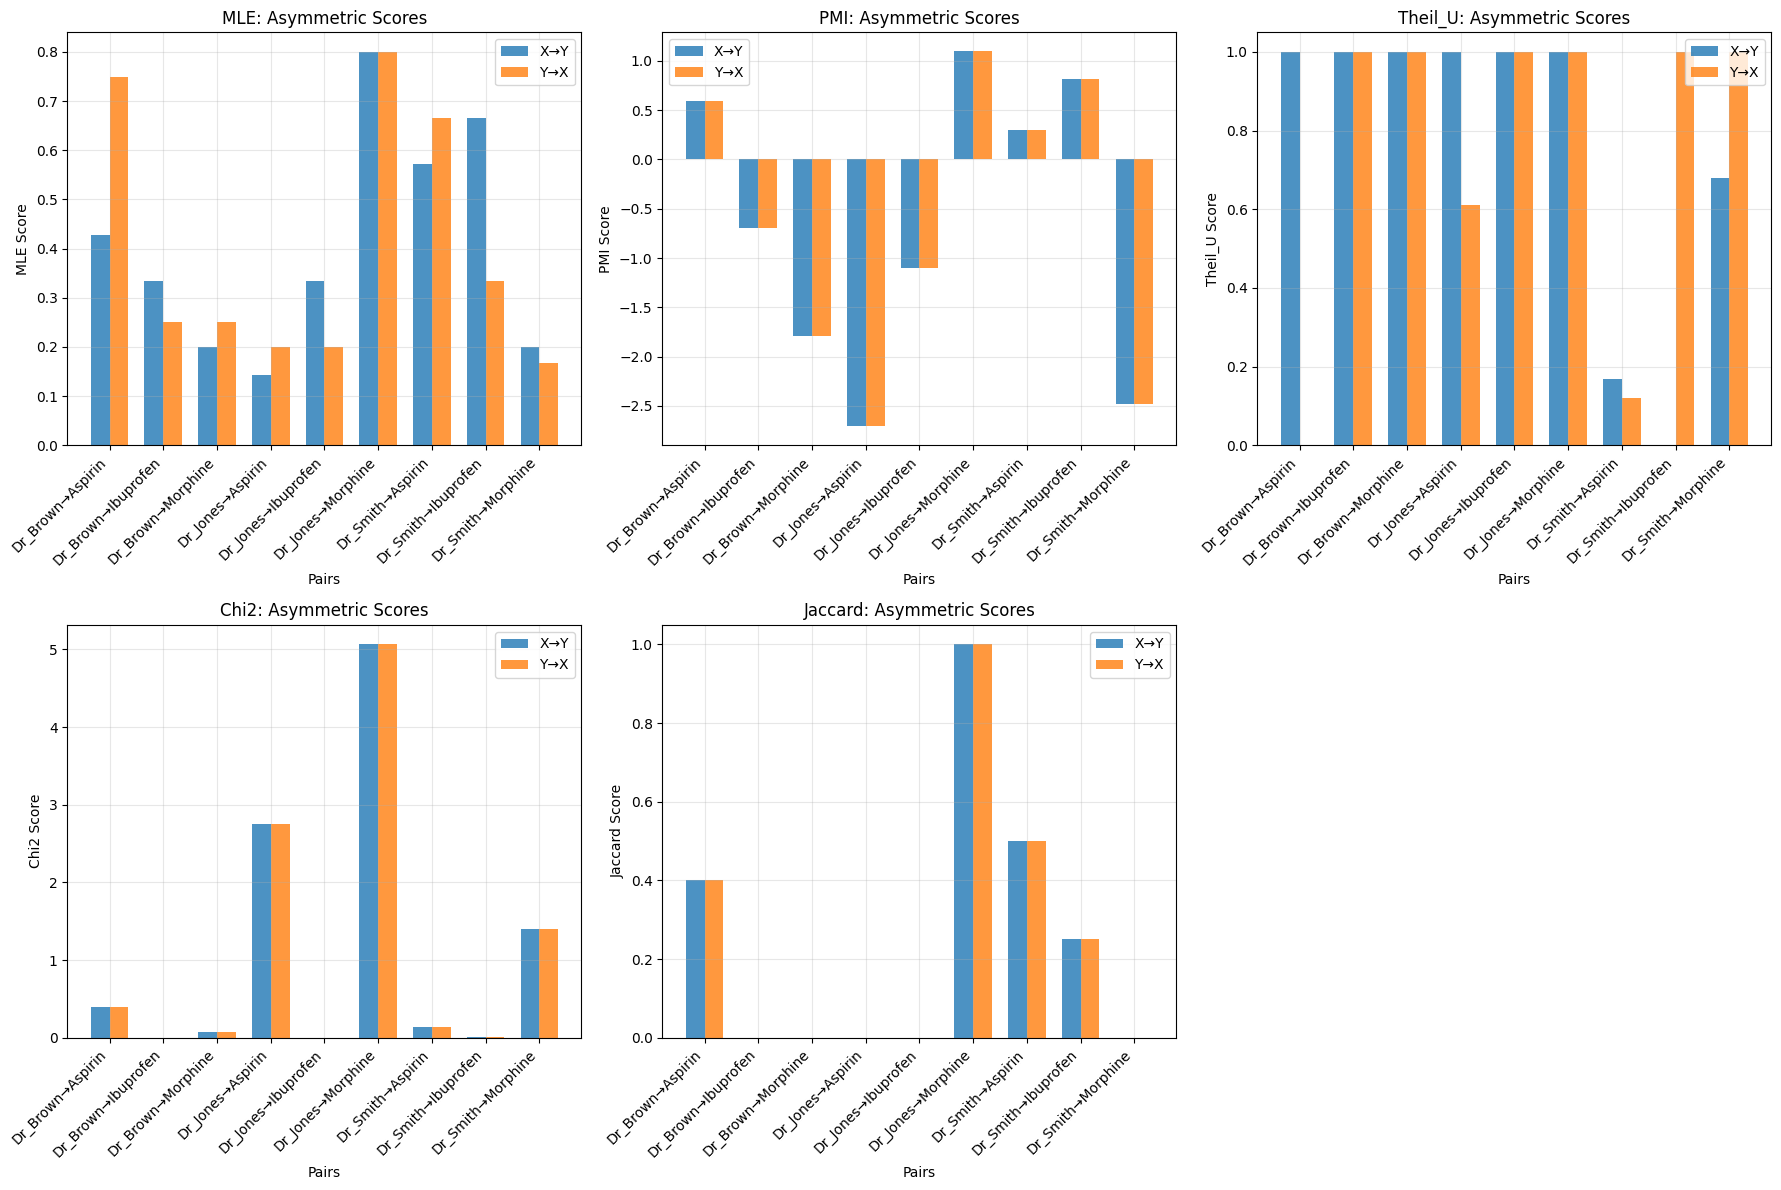


Measure Properties:
• MLE: Direct conditional probabilities [0,1]
• PMI: Information content [-∞,+∞], symmetric
• Theil U: Uncertainty reduction [0,1], asymmetric
• Chi2: Independence test [0,+∞], symmetric
• Jaccard: Context overlap [0,1], symmetric interpretation


In [3]:
# Compute multiple measures
measures = {
    'MLE': scorer.mle(),
    'PMI': scorer.pmi(),
    'Theil_U': scorer.theil_u(),
    'Chi2': scorer.chi2(),
    'Jaccard': scorer.jaccard_index()
}

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

pairs = list(mle_scores.keys())
pair_labels = [f"{p[0]}→{p[1]}" for p in pairs]

# Plot each measure
for i, (measure_name, scores) in enumerate(measures.items()):
    if i >= len(axes):
        break
        
    xy_scores = [scores[p][0] for p in pairs]
    yx_scores = [scores[p][1] for p in pairs]
    
    x = np.arange(len(pairs))
    width = 0.35
    
    axes[i].bar(x - width/2, xy_scores, width, label='X→Y', alpha=0.8)
    axes[i].bar(x + width/2, yx_scores, width, label='Y→X', alpha=0.8)
    
    axes[i].set_xlabel('Pairs')
    axes[i].set_ylabel(f'{measure_name} Score')
    axes[i].set_title(f'{measure_name}: Asymmetric Scores')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(pair_labels, rotation=45, ha='right')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
if len(measures) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

print("\nMeasure Properties:")
print("• MLE: Direct conditional probabilities [0,1]")
print("• PMI: Information content [-∞,+∞], symmetric")
print("• Theil U: Uncertainty reduction [0,1], asymmetric")
print("• Chi2: Independence test [0,+∞], symmetric")
print("• Jaccard: Context overlap [0,1], symmetric interpretation")

## Smoothing Effects

Demonstrate the impact of different smoothing methods on sparse data:

Sparse dataset:
  1. (Common, Frequent)
  2. (Common, Frequent)
  3. (Common, Frequent)
  4. (Common, Rare)
  5. (Rare_Item, Frequent)

Smoothing Effects on MLE Scores:
Pair                 MLE      Laplace  α=0.1    α=1.0   
--------------------------------------------------
('Common', 'Frequent') 0.750   0.667   0.738   0.667  
('Common', 'Rare')   1.000   0.667   0.917   0.667  
('Rare_Item', 'Frequent') 0.250   0.333   0.262   0.333  
('Rare_Item', 'Rare') 0.000   0.333   0.083   0.333  


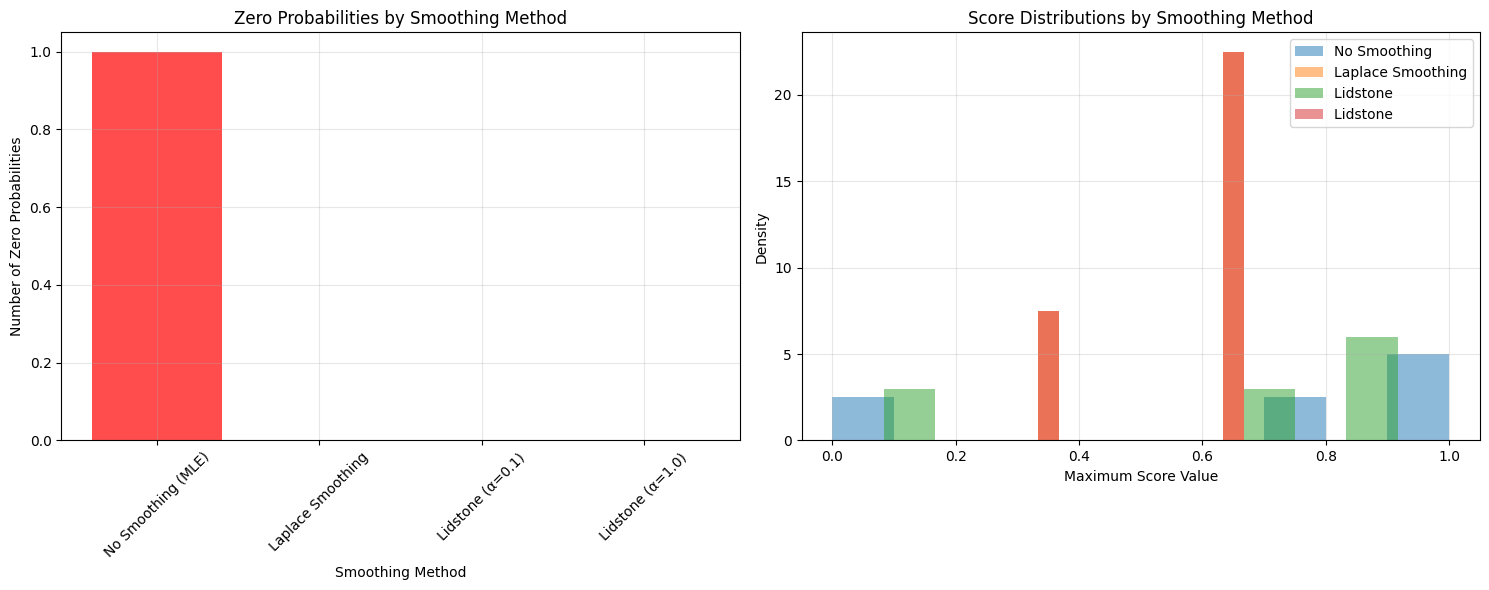


Smoothing Recommendations:
• No smoothing: Use when you have abundant data
• Laplace: General purpose, adds pseudo-count of 1
• Lidstone (low α): Conservative smoothing for sparse data
• Lidstone (high α): Aggressive smoothing, flattens distributions


In [4]:
# Create sparse dataset
sparse_data = [
    ('Common', 'Frequent'), ('Common', 'Frequent'), ('Common', 'Frequent'),  # High frequency
    ('Common', 'Rare'),                                                       # Low frequency
    ('Rare_Item', 'Frequent'),                                               # Low frequency
]

print("Sparse dataset:")
for i, (x, y) in enumerate(sparse_data):
    print(f"  {i+1}. ({x}, {y})")

# Create scorers with different smoothing methods
smoothing_methods = {
    'No Smoothing (MLE)': CatScorer(sparse_data, smoothing_method='mle'),
    'Laplace Smoothing': CatScorer(sparse_data, smoothing_method='laplace'),
    'Lidstone (α=0.1)': CatScorer(sparse_data, smoothing_method='lidstone', smoothing_alpha=0.1),
    'Lidstone (α=1.0)': CatScorer(sparse_data, smoothing_method='lidstone', smoothing_alpha=1.0)
}

# Compare smoothing effects
print("\nSmoothing Effects on MLE Scores:")
print("=" * 50)
print(f"{'Pair':<20} {'MLE':<8} {'Laplace':<8} {'α=0.1':<8} {'α=1.0':<8}")
print("-" * 50)

# Get all unique pairs
all_pairs = list(smoothing_methods['No Smoothing (MLE)'].mle().keys())

for pair in all_pairs:
    row = f"{str(pair):<20}"
    for method_name, scorer in smoothing_methods.items():
        mle_scores = scorer.mle()
        xy_score = mle_scores[pair][0]
        row += f" {xy_score:<7.3f}"
    print(row)

# Visualize smoothing effects
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Zero probability counts
method_names = list(smoothing_methods.keys())
zero_counts = []

for method_name, scorer in smoothing_methods.items():
    mle_scores = scorer.mle()
    zero_count = sum(1 for xy, yx in mle_scores.values() if xy == 0.0 or yx == 0.0)
    zero_counts.append(zero_count)

axes[0].bar(method_names, zero_counts, alpha=0.7, color='red')
axes[0].set_xlabel('Smoothing Method')
axes[0].set_ylabel('Number of Zero Probabilities')
axes[0].set_title('Zero Probabilities by Smoothing Method')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Plot 2: Score distributions
for method_name, scorer in smoothing_methods.items():
    mle_scores = scorer.mle()
    all_scores = [max(xy, yx) for xy, yx in mle_scores.values()]
    axes[1].hist(all_scores, alpha=0.5, bins=10, label=method_name.split('(')[0], density=True)

axes[1].set_xlabel('Maximum Score Value')
axes[1].set_ylabel('Density')
axes[1].set_title('Score Distributions by Smoothing Method')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSmoothing Recommendations:")
print("• No smoothing: Use when you have abundant data")
print("• Laplace: General purpose, adds pseudo-count of 1")
print("• Lidstone (low α): Conservative smoothing for sparse data")
print("• Lidstone (high α): Aggressive smoothing, flattens distributions")

## Interpretation Guidelines

Summary of when to use different measures and how to interpret results:

In [5]:
# Create summary table of measures
measure_info = {
    'Measure': ['MLE', 'PMI', 'Theil U', 'Chi-square', 'Jaccard', 'Fisher'],
    'Range': ['[0, 1]', '(-∞, +∞)', '[0, 1]', '[0, +∞)', '[0, 1]', '[0, 1]'],
    'Symmetric': ['No', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
    'Interpretation': [
        'Conditional probability',
        'Information content',
        'Uncertainty reduction',
        'Independence test',
        'Context overlap',
        'Statistical significance'
    ],
    'Best Use Case': [
        'Direct prediction',
        'Information analysis',
        'Feature selection',
        'Independence testing',
        'Similarity assessment',
        'Small samples'
    ]
}

df = pd.DataFrame(measure_info)
print("ASymCat Measure Comparison:")
print("=" * 80)
print(df.to_string(index=False))

print("\n\nPractical Workflow:")
print("1. Start with MLE for interpretable conditional probabilities")
print("2. Add Theil U for information-theoretic perspective")
print("3. Use appropriate smoothing for sparse data")
print("4. Compare multiple measures to validate findings")
print("5. Consider domain knowledge when interpreting asymmetric patterns")

print("\nAsymmetric vs Symmetric Decision Guide:")
print("• Use ASYMMETRIC measures when:")
print("  - You care about prediction direction (X→Y vs Y→X)")
print("  - Analyzing causal or temporal relationships")
print("  - Feature engineering for machine learning")
print("• Use SYMMETRIC measures when:")
print("  - You want overall association strength")
print("  - Clustering or similarity analysis")
print("  - Independence testing")

print("\nThis concludes the ASymCat Simple Examples notebook!")
print("Check the documentation for more advanced usage and examples.")

ASymCat Measure Comparison:
   Measure    Range Symmetric           Interpretation         Best Use Case
       MLE   [0, 1]        No  Conditional probability     Direct prediction
       PMI (-∞, +∞)       Yes      Information content  Information analysis
   Theil U   [0, 1]        No    Uncertainty reduction     Feature selection
Chi-square  [0, +∞)       Yes        Independence test  Independence testing
   Jaccard   [0, 1]       Yes          Context overlap Similarity assessment
    Fisher   [0, 1]       Yes Statistical significance         Small samples


Practical Workflow:
1. Start with MLE for interpretable conditional probabilities
2. Add Theil U for information-theoretic perspective
3. Use appropriate smoothing for sparse data
4. Compare multiple measures to validate findings
5. Consider domain knowledge when interpreting asymmetric patterns

Asymmetric vs Symmetric Decision Guide:
• Use ASYMMETRIC measures when:
  - You care about prediction direction (X→Y vs Y→X)
  - Anal